In [1]:
#Do some imports
import pandas as pd
import matplotlib as plt
from citipy import citipy
import openweathermapy.core as owm
from config import api_key
import numpy as np
import requests 
import time


In [2]:
#init variables
key = api_key()

weather_df=pd.DataFrame(columns=['City','Country','Lat','Lon','Temp_F','Humidity(%)',
                                 'Cloudiness(%)','Wind Speed (mph)'])
i_good = 0
print_log_df = pd.DataFrame(columns=['log_entry'])

log_header = 'lat,long,city,country,weather_found,temp_f,humidity_percent,clouds_percent,wind_mph,url_call'
print_log_df.loc[0]=log_header
#print(print_log_df)
max_cnt = 700

In [14]:
#Query for data
for i in range(0,max_cnt):
    if not(i%10):  #track query progress
        print('done ' + str(i) + ' of ' +str(max_cnt))
    #generate uniform distribution of lat and longetude.Then find the cities
    lat  = np.random.uniform(low = -90 , high = 90)
    long = np.random.uniform(low = -180 , high = 180)
    city = citipy.nearest_city(lat,long)
    
    #build the query for weather
    city_country = str(city.city_name) + ',' + str(city.country_code)
    #print(city_country)
    log_data=str(lat) + ',' + str(long) + ','+str(city_country)
    url = 'http://api.openweathermap.org/data/2.5/weather?appid=' + key +'&q='+ city_country + '&units=imperial'
    time.sleep(0.05)
    
    try: #do the weather query
        resp = requests.get(url)
        data = resp.json()
        
        #print(data)
        temp_f = data['main']['temp']  
        weather_df.loc[i_good] = [city.city_name, city.country_code,
                            lat,long,
                            temp_f,
                            data['main']['humidity'],
                            data['clouds']['all'],
                            data['wind']['speed']]

        log_data = log_data + ',' + str(True) + ',' + str(temp_f) + ',' + str(data['main']['humidity']) + ',' \
                    + str(data['clouds']['all']) + ',' + str(data['wind']['speed']) + ',' + url
        i_good =i_good + 1
        
    except:
        #print('NO data for ' + city_country)
        log_data = log_data + ',' + str(False) + ',,,,' + url
        #print(log_data)
    #print('------------')
    print_log_df.loc[len(print_log_df)]=log_data
    
#dump the print log file to disk 
print_log_df.to_csv('C:\\junk\weather_print_log.csv',header=False)
weather_df.to_csv('C:\\junk\weather_df.csv',header=True)

done 0 of 700
done 10 of 700
done 20 of 700
done 30 of 700
done 40 of 700
done 50 of 700
done 60 of 700
done 70 of 700
done 80 of 700
done 90 of 700
done 100 of 700
done 110 of 700
done 120 of 700
done 130 of 700
done 140 of 700
done 150 of 700
done 160 of 700
done 170 of 700
done 180 of 700
done 190 of 700
done 200 of 700
done 210 of 700
done 220 of 700
done 230 of 700
done 240 of 700
done 250 of 700
done 260 of 700
done 270 of 700
done 280 of 700
done 290 of 700
done 300 of 700
done 310 of 700
done 320 of 700
done 330 of 700
done 340 of 700
done 350 of 700
done 360 of 700
done 370 of 700
done 380 of 700
done 390 of 700
done 400 of 700
done 410 of 700
done 420 of 700
done 430 of 700
done 440 of 700
done 450 of 700
done 460 of 700
done 470 of 700
done 480 of 700
done 490 of 700
done 500 of 700
done 510 of 700
done 520 of 700
done 530 of 700
done 540 of 700
done 550 of 700
done 560 of 700
done 570 of 700
done 580 of 700
done 590 of 700
done 600 of 700
done 610 of 700
done 620 of 700
don

Look at 'Latitude vs Temperature'

In [15]:
print(len(weather_df) )
weather_df_no_dups = weather_df.drop_duplicates(subset=['City','Country'])
print(len(weather_df_no_dups) )

911
518


In [8]:
#seach and destroy deplicate entries
weather_df.keys()

Index(['City', 'Country', 'Lat', 'Lon', 'Temp_F', 'Humidity(%)',
       'Cloudiness(%)', 'Wind Speed (mph)'],
      dtype='object')

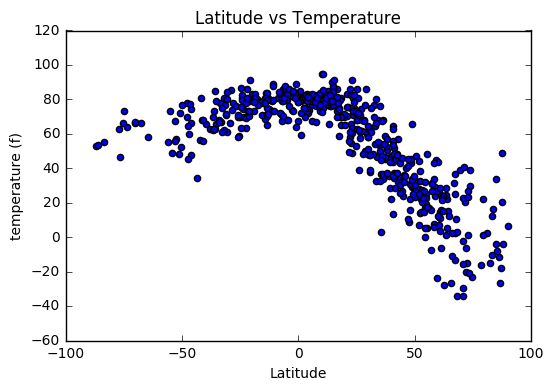

In [16]:
%matplotlib inline
import matplotlib as plt
plt.pyplot.scatter(weather_df_no_dups['Lat'], weather_df_no_dups['Temp_F'])
plt.pyplot.xlabel('Latitude')
plt.pyplot.ylabel('temperature (f)')
plt.pyplot.title('Latitude vs Temperature')
plt.pyplot.show()

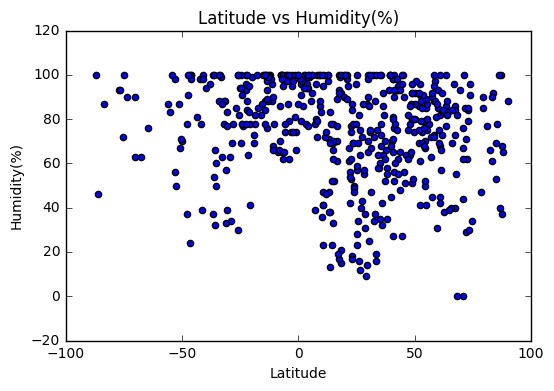

In [18]:
plt.pyplot.scatter(weather_df_no_dups['Lat'], weather_df_no_dups['Humidity(%)'])
plt.pyplot.xlabel('Latitude')
plt.pyplot.ylabel('Humidity(%)')
plt.pyplot.title('Latitude vs Humidity(%)')
plt.pyplot.show()


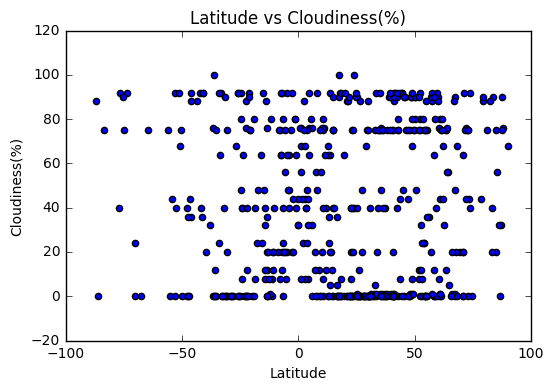

In [22]:
plt.pyplot.scatter(weather_df_no_dups['Lat'], weather_df_no_dups['Cloudiness(%)'])
plt.pyplot.xlabel('Latitude')
plt.pyplot.ylabel('Cloudiness(%)')
plt.pyplot.title('Latitude vs Cloudiness(%)')
plt.pyplot.show()

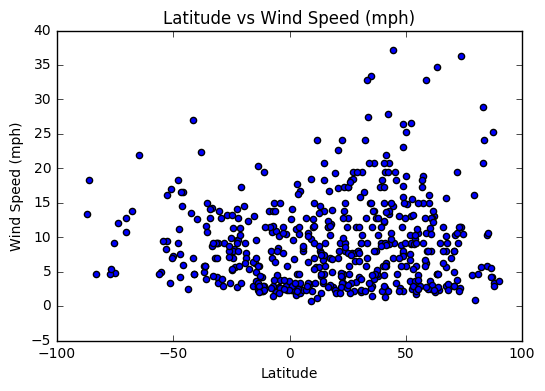

In [21]:
plt.pyplot.scatter(weather_df_no_dups['Lat'], weather_df_no_dups['Wind Speed (mph)'])
plt.pyplot.xlabel('Latitude')
plt.pyplot.ylabel('Wind Speed (mph)')
plt.pyplot.title('Latitude vs Wind Speed (mph)')
plt.pyplot.show()

Observations
1) From the Latitude vs Temperature plot you can tell its winter time in the northern hemisphere because you expect without seasons you expect a symmetric pattern of temperature. 
2) The other variables of wind speed, cloudiness, and humidify don't show as clear a pattern for latitude.
3) The geographical distributions of cities is likely skewed towards cities on the coasts because the majority of random coordinates likely occurred in an ocean, and the nearest city was on a coast.  Because oceans take up two thirds on the worlds surface area, I suspect coastal cities are over represented  in the data set by two thirds.
